## Pandas##

Pandas jest *open source* biblioteką pythona, której podstawą jest NumPy.

Pozwala na szybką analizę danych oraz efektywne ich czyszczenie i przygotowanie. Moze być traktowana jako: Pythonowy odpowiednik Excela, albo jako tablica atrybutowa w GIS z jej pełną funkcjonalnością.

Pandas jest podstawowym narzędziem wstępnej analizy i **inżynierii danych**.


In [2]:
import numpy as np
import pandas as pd

print('numpy',np.__version__)
print('pandas',pd.__version__)

numpy 1.14.3
pandas 0.24.1


#### Pandas ma dwie podstawowe struktury danych **Series** i **Data Frames**



Basic syntax for creating a pandas **Series**:

my_series = pd.Series(data, index)

From the above, data can be any object type such as dictionary, list, or even a NumPy array while index signifies axis labels with which the Series will be indexed.Index axis is optional. 

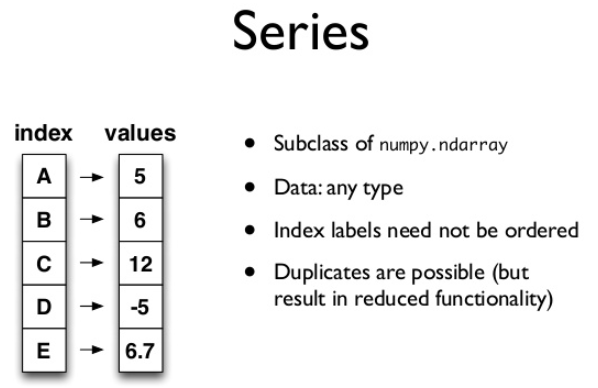 



In [2]:
countries=['USA','Nigeria','France','Ghana']
my_data=[100.,200,300,400]

ser1=pd.Series(my_data,countries)
ser1

USA        100.0
Nigeria    200.0
France     300.0
Ghana      400.0
dtype: float64

In [3]:
# Series z tablicy NumPy     # indeksy tworzone są domyslnie od 0 ......
np.random.seed(100)
ser=pd.Series(np.random.randn(7));ser

0   -1.749765
1    0.342680
2    1.153036
3   -0.252436
4    0.981321
5    0.514219
6    0.221180
dtype: float64

In [4]:
# Series from Python Dictionary

my_dict={'a':50,'b':60,'c':70,'d':80,'e':np.nan}
ser3=pd.Series(my_dict)
ser3

a    50.0
b    60.0
c    70.0
d    80.0
e     NaN
dtype: float64

In [6]:
ser3.head(3)   # wyświetlenie pierwszych 3 wierszy tablicy

a    50.0
b    60.0
c    70.0
dtype: float64

In [7]:
#The following example creates a Series structure of the first 5 months of the year with a specified index of month names

import calendar as cal

monthNames=[cal.month_name[i] for i in np.arange(1,6)]     # zwrócić uwagę na rodzaj zapisu
months=pd.Series(np.arange(1,6),index=monthNames);months
months

January     1
February    2
March       3
April       4
May         5
dtype: int32

**Dostęp do Series**

In [13]:
# dostęp do Value

print(ser1['USA'])
print(ser1.loc['USA'])
print(ser1[0])

# listowanie indeksów
i_ser1=ser1.index
print(i_ser1)
print(i_ser1[1])

100.0
100.0
100.0
Index(['USA', 'Nigeria', 'France', 'Ghana'], dtype='object')
Nigeria


**Przypisanie wartości**

In [14]:
ser1['Ghana']=800;ser1

USA        100.0
Nigeria    200.0
France     300.0
Ghana      800.0
dtype: float64

In [16]:
ser1['Poland']=30
ser1

USA        100.0
Nigeria    200.0
France     300.0
Ghana      800.0
Poland      30.0
dtype: float64

In [17]:
# Obliczenia na Series jak NumPy

ser4=pd.Series([1,2,10,23,np.nan])
ser5=pd.Series([22,10,1])
ser5-ser4


0    21.0
1     8.0
2    -9.0
3     NaN
4     NaN
dtype: float64

### Data Frames ### 

Data Frames jest 2D strukturą danych, w której dane są zorganizowane w formie wierszy i kolumn.

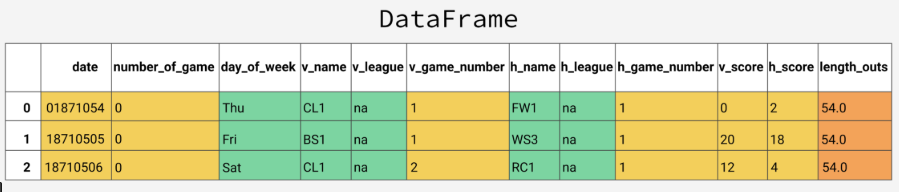



**Tworzenie Data Frames**

my_df = pd.DataFrame(data, index, [columns])

In [18]:
# Wersja 1 (z dwuwymiarowej tablicy numpy)

#df=pd.DataFrame(np.random.randn(10,10))
#df=pd.DataFrame(np.random.randn(5,4),columns=['A','B','C','D'])
df=pd.DataFrame(np.random.randn(5,4),range(0,5),['A','B','C','D'])
df

,A,B,C,D
0,-1.070043,-0.189496,0.255001,-0.458027
1,0.435163,-0.583595,0.816847,0.672721
2,-0.104411,-0.531280,1.029733,-0.438136
3,-1.118318,1.618982,1.541605,-0.251879
4,-0.842436,0.184519,0.937082,0.731000


In [19]:
# Wersja 2

dd={'A':pd.Series(np.random.randn(5)),
   'B':pd.Series(np.random.randn(5)),
   'C':pd.Series(np.random.randint(1,100,5)),
   'D':pd.Series(np.random.randint(1,100,5))}
df=pd.DataFrame(dd)

df.head()

,A,B,C,D
0,1.361556,-0.756352,4,6
1,-0.326238,0.816454,49,72
2,0.055676,0.750445,53,39
3,0.222400,-0.455947,44,87
4,-1.443217,1.189622,37,95


**Czytanie i zapisywanie danych**

In [21]:
# przykładowe dane

drinks=pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()


#dodatkowe
#    ...=pd.read_csv('my_file.csv',sep=';',encoding='latin-2',nrows=1000,skiprows=[2,5])

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [5]:
drinks.to_csv('drinki.csv',index=None)    # index - czy będzie zapisany indeks
drinks.tail(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
183,Tanzania,36,6,1,5.7,Africa
184,USA,249,158,84,8.7,North America
185,Uruguay,115,35,220,6.6,South America
186,Uzbekistan,25,101,8,2.4,Asia
187,Vanuatu,21,18,11,0.9,Oceania
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa
192,Zimbabwe,64,18,4,4.7,Africa


Zadanie 1

Zapisać plik `stockholm_daily_mean_temperature_1756_2017.txt` jako .csv (rozdzielony przecinkami, z ,, w kolumnie 4 Missing values: -999.0, i nazwami kolumn: year,month,day,Tobs,Tcor,Tday,id.

In [45]:
tempS = np.genfromtxt('stockholm_daily_mean_temperature_1756_2017.txt')

In [46]:
tempS[:,3][tempS[:,3]==-999]=np.nan

In [47]:
tStockh=pd.DataFrame(tempS,columns=['year','month','day','Tobs','Tcor','Tday','id'])

In [50]:
tStockh.head()

,year,month,day,Tobs,Tcor,Tday,id
0,1756.0,1.0,1.0,-8.7,-8.7,-8.7,1.0
1,1756.0,1.0,2.0,-9.2,-9.2,-9.2,1.0
2,1756.0,1.0,3.0,-8.6,-8.6,-8.6,1.0
3,1756.0,1.0,4.0,-7.7,-7.7,-7.7,1.0
4,1756.0,1.0,5.0,-7.2,-7.2,-7.2,1.0


In [54]:
tStockh.to_csv('stocholm_airtemp.csv',index=None)

**Wstępna analiza danych**

In [74]:
#drinks.head()    # pierwsze pięć wierszy, albo więcej  head(10)
#drinks.tail()

#drinks.shape      # liczba wierszy i kolumn tablicy
#drinks.dtypes     # typy kolumn
#drinks.columns     # kolumny
#drinks.index       # opis indeksów
# for i in range(len(drinks.columns)):
#      print(drinks.columns[i],type(drinks.iloc[0,i]))

#drinks.describe()    # statystyka danych
#drinks['continent'].value_counts()  # obliczanie występowania
#drinks['continent'].unique()
#drinks['continent'].nunique()    # liczba unikalnych wartości w kolumnie 
#len(drinks)       # liczba wierszy

#drinks.iloc[len(drinks)-1]    # dowolny wiersz    (iloc  po numerze indeksu)

#drinks.loc[drinks['country']=='Poland']     (po Value w kolumnue)




# xx=drinks['total_litres_of_pure_alcohol'].idxmax()
# print(xx)
# drinks.iloc[xx]

#SUMMARY  FUNCTIONS

#drinks.sum()
#drinks.count()
#drinks.median()
#drinks.min()
#drinks.max()
#drinks.quantile([0.25,0.75])


RangeIndex(start=0, stop=193, step=1)

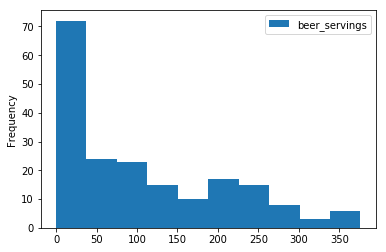

In [76]:
drinks[['beer_servings']].plot.hist();   # ploting pod pandas

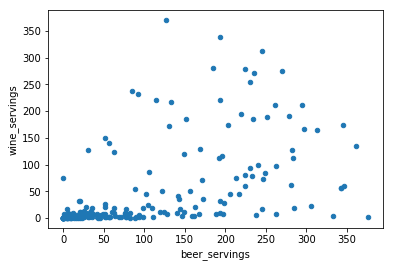

In [78]:
drinks.plot.scatter(x='beer_servings',y='wine_servings');

Zadanie 2 

Utworzyć listę nazw kolumn w df drinks

In [65]:
lista=list(drinks.columns)
print(lista)

['country', 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'continent']


#### Wybieranie pojedyńczej wartości z DF        .iat   .at 

In [81]:
drinks.iat[5,3]
#drinks.at[4,'wine_servings']
#drinks.iloc[[5],[3]]
drinks.iloc[1:5]
#drinks.values

array([['Afghanistan', 0, 0, 0, 0.0, 'Asia'],
       ['Albania', 89, 132, 54, 4.9, 'Europe'],
       ['Algeria', 25, 0, 14, 0.7, 'Africa'],
       ...,
       ['Yemen', 6, 0, 0, 0.1, 'Asia'],
       ['Zambia', 32, 19, 4, 2.5, 'Africa'],
       ['Zimbabwe', 64, 18, 4, 4.7, 'Africa']], dtype=object)

### Tworzenie podzbiorów (filtracja, subsets ) wierszy i kolumn

In [95]:

x=drinks[10:20]
#x=drinks[['country','wine_servings']]
#x=drinks[drinks['wine_servings']>100]
#x=drinks[['country','wine_servings']][~(drinks['wine_servings']>100)]
#x=drinks.filter(regex='^bee').head()
#x=drinks.iloc[50:,[1,2,3]]
#x=drinks.iloc[[12,15]]   # 12 i 15 rekord
#x=drinks.iloc[1:3,1:4]    # zakres rekordów i kolumn
#x=drinks.loc[:,'beer_servings':'wine_servings']
# OPERACJE LOGICZNE
#x=drinks.spirit_servings > 100    # 
#x=drinks[(drinks.total_litres_of_pure_alcohol>10) & (drinks.beer_servings>200)]
#x=drinks.loc[drinks.wine_servings>100,['country','wine_servings']]
x.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
10,Azerbaijan,21,46,5,1.3,Europe
11,Bahamas,122,176,51,6.3,North America
12,Bahrain,42,63,7,2.0,Asia
13,Bangladesh,0,0,0,0.0,Asia
14,Barbados,143,173,36,6.3,North America


In [99]:
# Sumaryzacja danych w podzbiorach

drinks[['beer_servings']].max()
drinks[[drinks.columns[1],drinks.columns[2]]].describe()

drinks.iloc[0:4,1:4].describe()

,beer_servings,spirit_servings,wine_servings
count,4.000000,4.000000,4.000000
mean,89.750000,67.500000,95.000000
std,110.076867,77.980767,146.465013
min,0.000000,0.000000,0.000000
25%,18.750000,0.000000,10.500000
50%,57.000000,66.000000,34.000000
75%,128.000000,133.500000,118.500000
max,245.000000,138.000000,312.000000


In [102]:
# Pobieranie losowej próby wierszy (za pomocą częstości i liczby wierszy)

xx=drinks.sample(frac=0.3)
# xx=drinks.sample(n=10)
xx.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
41,Costa Rica,149,87,11,4.4,North America
178,Tuvalu,6,41,9,1.0,Oceania
108,Mauritius,98,31,18,2.6,Africa
98,Lithuania,343,244,56,12.9,Europe
172,Togo,36,2,19,1.3,Africa


In [105]:
# Pobieranie rekordów z najmniejszymi i największymi wartościami

xx=drinks.nlargest(10,'beer_servings')
#xx=drinks.nsmallest(10,'wine_servings')
#xx=drinks[drinks['wine_servings']>0].nsmallest(10,'wine_servings')    # chaining mathod
xx

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
24,Brunei,31,2,1,0.6,Asia
30,Cambodia,57,65,1,2.2,Asia
33,Central African Republic,17,2,1,1.8,Africa
34,Chad,15,1,1,0.4,Africa
38,Comoros,1,3,1,0.1,Africa
47,DR Congo,32,3,1,2.3,Africa
53,Egypt,6,4,1,0.2,Africa
59,Fiji,77,35,1,2.0,Oceania
63,Gambia,8,0,1,2.4,Africa
72,Guyana,93,302,1,7.1,South America


### Sortowanie  i zmiana postaci danych  (resetowanie indeksów)

In [106]:
# sortowanie po kolumnie

drinks.sort_values('beer_servings').head(10)
drinks.sort_values('beer_servings',ascending=False).head(10)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,Africa
45,Czech Republic,361,170,134,11.8,Europe
62,Gabon,347,98,59,8.9,Africa
65,Germany,346,117,175,11.3,Europe
98,Lithuania,343,244,56,12.9,Europe
135,Poland,343,215,56,10.9,Europe
188,Venezuela,333,100,3,7.7,South America
81,Ireland,313,118,165,11.4,Europe
129,Palau,306,63,23,6.9,Oceania
140,Romania,297,122,167,10.4,Europe


In [ ]:
# Sortowanie po indeksach

drinks.sort_index

In [108]:
#  Resetowanie  indeksów

drinks.reset_index().head()

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0,0,0,0.0,Asia
1,1,Albania,89,132,54,4.9,Europe
2,2,Algeria,25,0,14,0.7,Africa
3,3,Andorra,245,138,312,12.4,Europe
4,4,Angola,217,57,45,5.9,Africa


### Zmiana nazwy kolumny 

In [111]:
df2=drinks.rename(columns={'country':'kraj'})   # zmiana nazwy kolumny w kopii
df2[:4]
drinks.columns
#df2.columns
# df2.rename(columns={'kraj':'kk'},inplace=True)
# df2[:2]

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

**Dodawanie kolumn, lub zastępowanie jej treści jeśli kolumna istnieje**


In [113]:
# df2['xxxx']=df2.beer_servings+df2.spirit_servings
df2[:4]

df2.insert(1,'yyyy2',0)  # wstawianie kolumny  (miejsce drugie)  wypełnionej zerami
df2[:4]

,kraj,yyyy2,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0,0.0,Asia
1,Albania,0,89,132,54,4.9,Europe
2,Algeria,0,25,0,14,0.7,Africa
3,Andorra,0,245,138,312,12.4,Europe


**Usuwanie kolumn**

In [115]:
#del df2['kk']
df2[:3]

#df2.pop('yyyy')
df2[:3]

df2.drop(['yyyy2'], axis=1).head()   # może być używana zarówno do wierszy jak i kolumn (wiersze axis=0, kolumny axis=1)

,kraj,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


**Zmienianie danych**

In [22]:
# prosta zmiana

drinks.loc[2,'beer_servings']=100

# drinks.loc[:,'beer_servings']=100
# drinks.loc[2:,'beer_servings']=100

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,100,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [26]:
# zmiana wartości pod warunkiem

drinks.loc[drinks['beer_servings']<50,'beer_servings']=100


drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,"(0, beer_servings)"
0,Afghanistan,100,0,0,0.0,Asia,1
1,Albania,89,132,54,4.9,Europe,1


**Obliczanie w kolumnach za pomocą funkcji**

In [118]:
# Wykorzystanie funkcji numpy

drinks['beer_servings']=drinks.beer_servings.apply(np.sqrt)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,10.000000,0,0,0.0,Asia
1,Albania,9.433981,132,54,4.9,Europe
2,Algeria,10.000000,0,14,0.7,Africa
3,Andorra,15.652476,138,312,12.4,Europe
4,Angola,14.730920,57,45,5.9,Africa


In [119]:
# zmiana wartości funkcja lambda

drinks['beer_servings'] = drinks['beer_servings'].apply(lambda x: round(x))

In [120]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,10,0,0,0.0,Asia
1,Albania,9,132,54,4.9,Europe
2,Algeria,10,0,14,0.7,Africa
3,Andorra,16,138,312,12.4,Europe
4,Angola,15,57,45,5.9,Africa


In [121]:
# Prosta funkcja - jeden parametr  (zmienia istniejący, lub tworzy nowy)

def funA(x):
    return 100*x

drinks['beer_servings']=drinks.beer_servings.apply(funA)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,1000,0,0,0.0,Asia
1,Albania,900,132,54,4.9,Europe
2,Algeria,1000,0,14,0.7,Africa
3,Andorra,1600,138,312,12.4,Europe
4,Angola,1500,57,45,5.9,Africa


In [122]:
# Wersja 1
# Funkcja na podstawie kilku kolumn tworzy nową lub aktualizuje starą

def fun1(a,b,c):
    p=a+b+c
    return p

drinks['SPLUS']=drinks.apply(lambda drinks: 
pd.Series(fun1(drinks['beer_servings'],drinks['spirit_servings'],drinks['wine_servings'])),axis=1)

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,SPLUS
0,Afghanistan,1000,0,0,0.0,Asia,1000
1,Albania,900,132,54,4.9,Europe,1086
2,Algeria,1000,0,14,0.7,Africa,1014
3,Andorra,1600,138,312,12.4,Europe,2050
4,Angola,1500,57,45,5.9,Africa,1602


In [123]:
# Wersja 2
# Funkcja na podstawie kilku kolumn tworzy nowe lub aktualizuje stare

def fun2(a,b,c):
    p1=a+b+c
    p2=a+c
    return (p1,p2)

drinks[['SPLUSA','SPLUSL']]=drinks.apply(lambda drinks: 
pd.Series(fun2(drinks['beer_servings'],drinks['spirit_servings'],drinks['wine_servings'])),axis=1)

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,SPLUS,SPLUSA,SPLUSL
0,Afghanistan,1000,0,0,0.0,Asia,1000,1000,1000
1,Albania,900,132,54,4.9,Europe,1086,1086,954
2,Algeria,1000,0,14,0.7,Africa,1014,1014,1014
3,Andorra,1600,138,312,12.4,Europe,2050,2050,1912
4,Angola,1500,57,45,5.9,Africa,1602,1602,1545
